### Score: 49

Q1.[5+5+5]

Q2.[10+9]

Q3.[5+10]

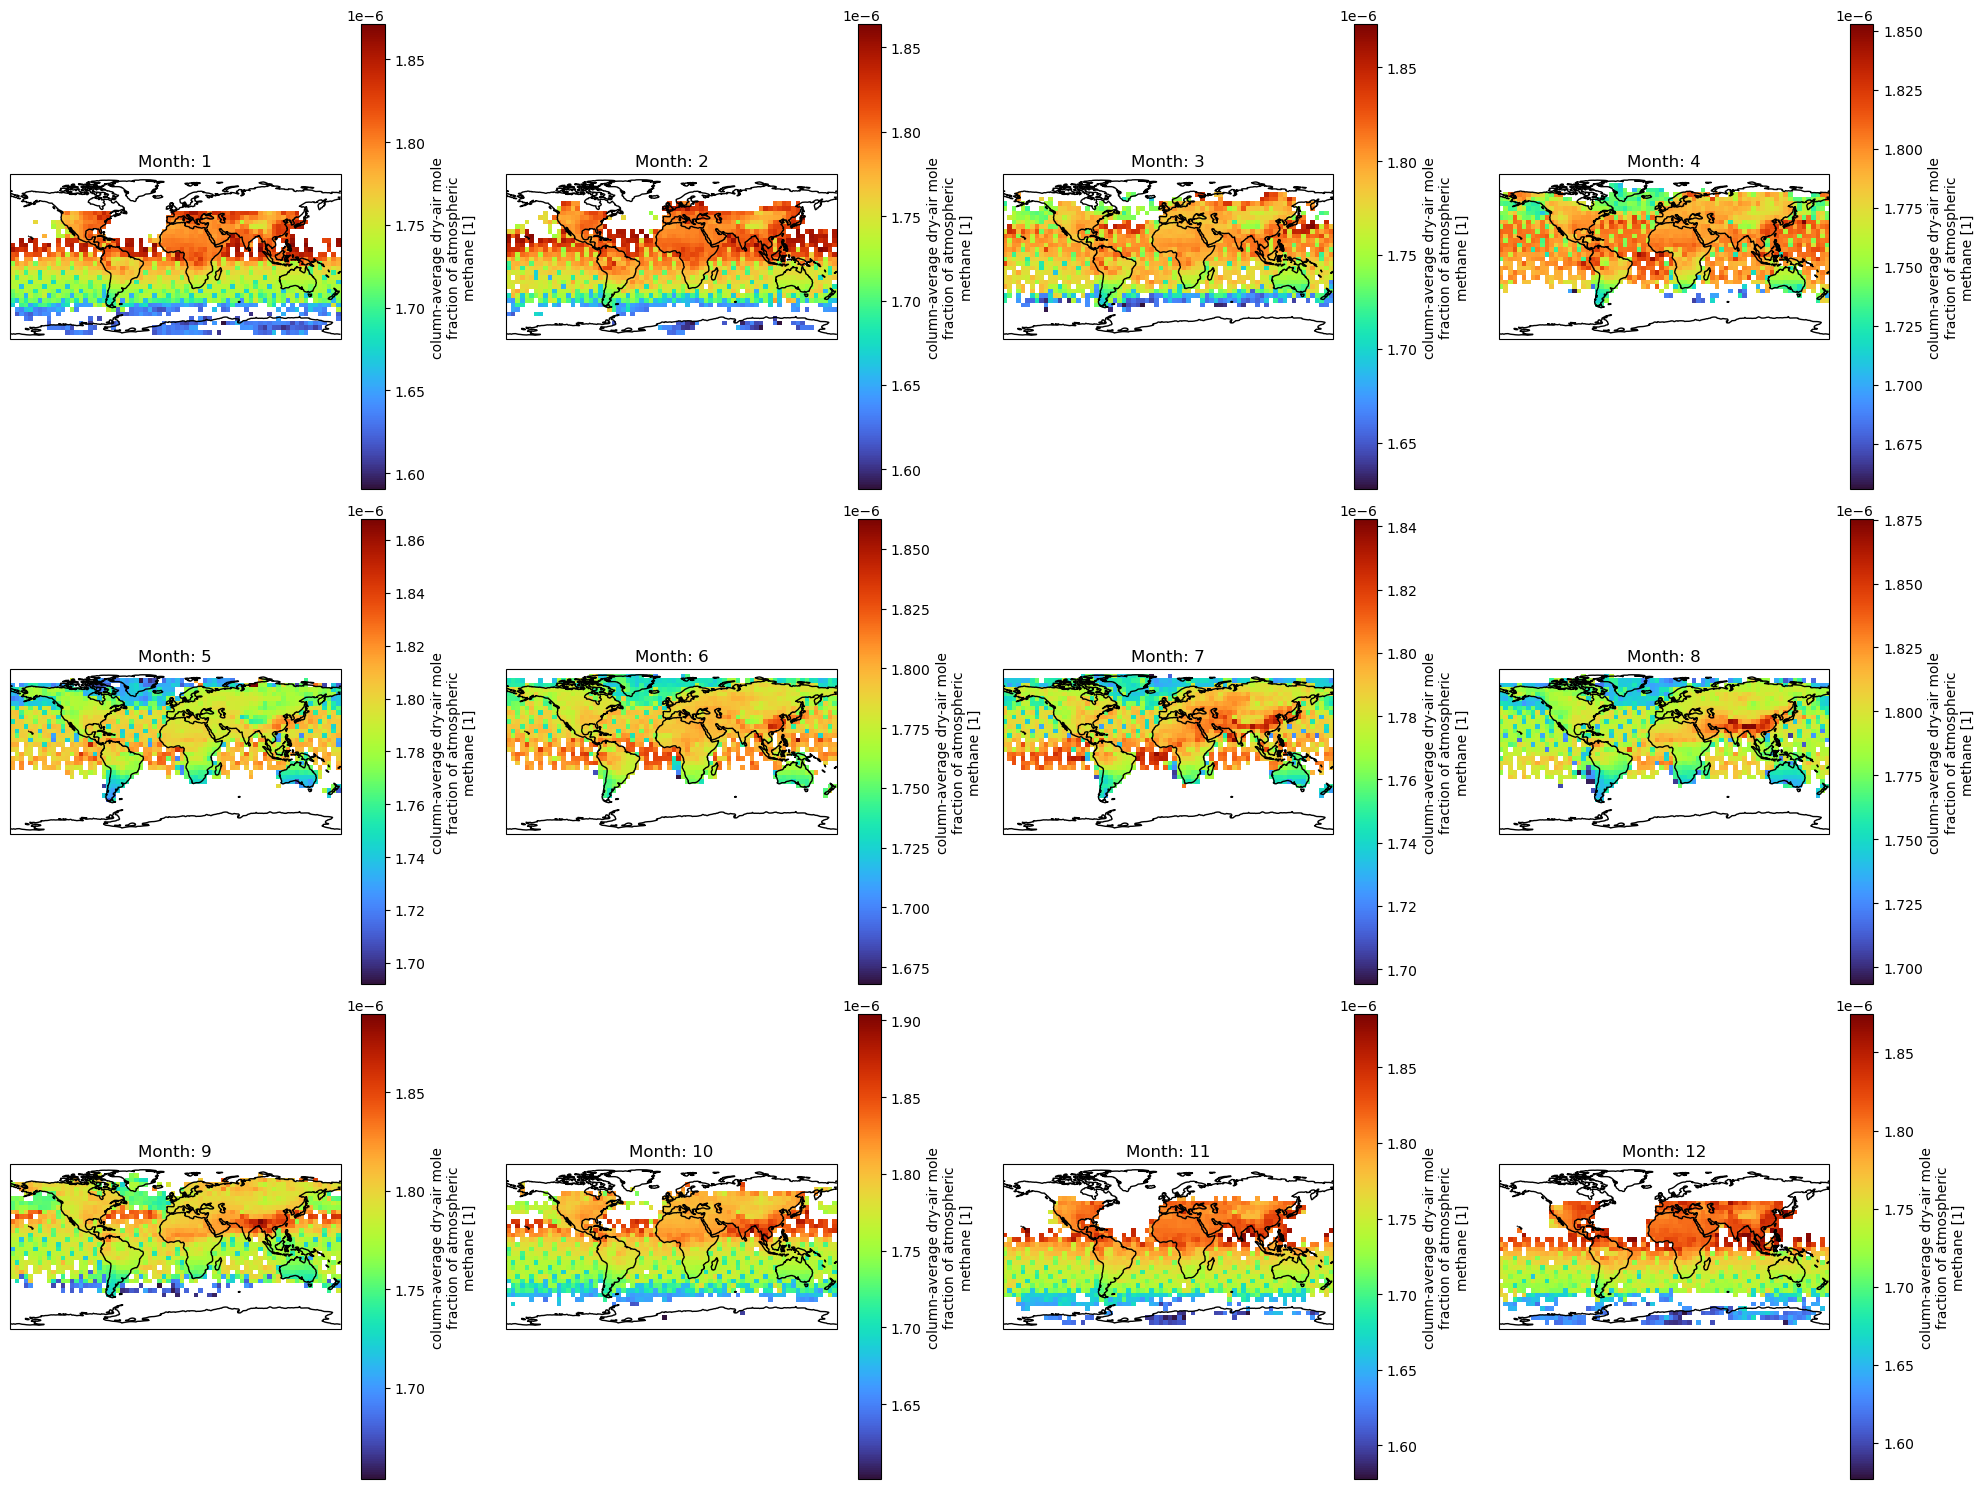

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

#1.1
# 读取数据
ds = xr.open_dataset(r'C:\Users\zjm\Desktop\ESE_5023\200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc')

# 计算每个月的climatology
monthly_climatology = ds.xch4.groupby('time.month').mean(dim='time')

# 绘制12个月的气候平均值
fig, axes = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, ax in enumerate(axes):
    # NOTE: 可以试试只绘制一个颜色条
    monthly_climatology.isel(month=i).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='turbo')
    ax.coastlines()
    ax.set_title(f'Month: {i+1}')

plt.tight_layout()
plt.show()


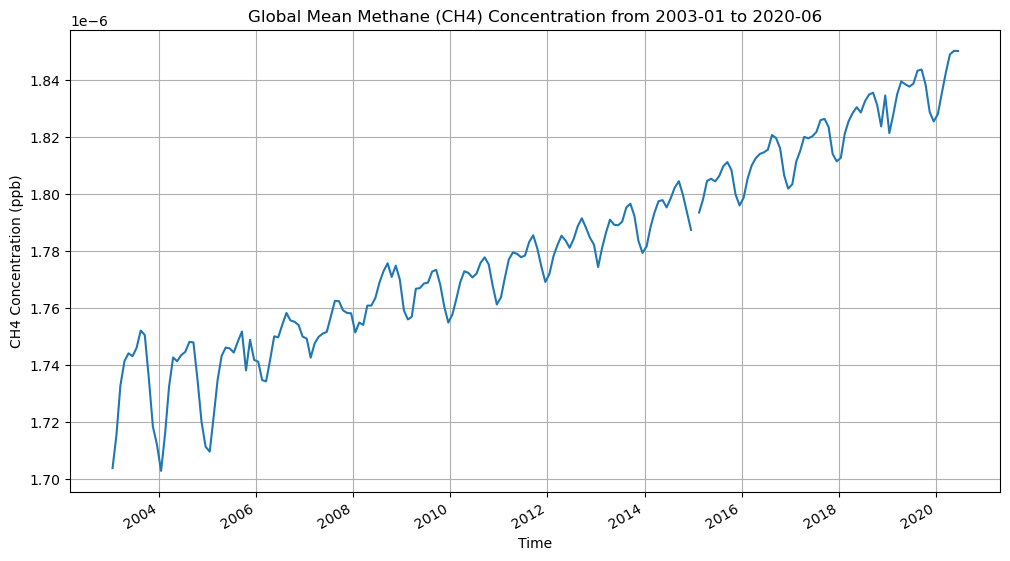

<xarray.DataArray 'time' (time: 210)>
array(['2003-01-16T12:00:00.000000000', '2003-02-15T00:00:00.000000000',
       '2003-03-16T12:00:00.000000000', ..., '2020-04-16T00:00:00.000000000',
       '2020-05-16T12:00:00.000000000', '2020-06-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2003-01-16T12:00:00 2003-02-15 ... 2020-06-16
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T
    comment:        time center

In [6]:
# #1.2
# # 计算全球平均甲烷浓度
global_mean_ch4 = ds.xch4.sel(time=slice('2003-01','2020-06')).mean(dim=['lat', 'lon'])

# 绘制时间序列
plt.figure(figsize=(12, 6))
global_mean_ch4.plot()
plt.title('Global Mean Methane (CH4) Concentration from 2003-01 to 2020-06')
plt.xlabel('Time')
plt.ylabel('CH4 Concentration (ppb)')
plt.grid(True)
plt.show()

#
ds.time

C:\dev\anaconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'Q-Dec' is deprecated and will be removed in a future version, please use 'QE-DEC' instead.
  index_grouper = pd.Grouper(


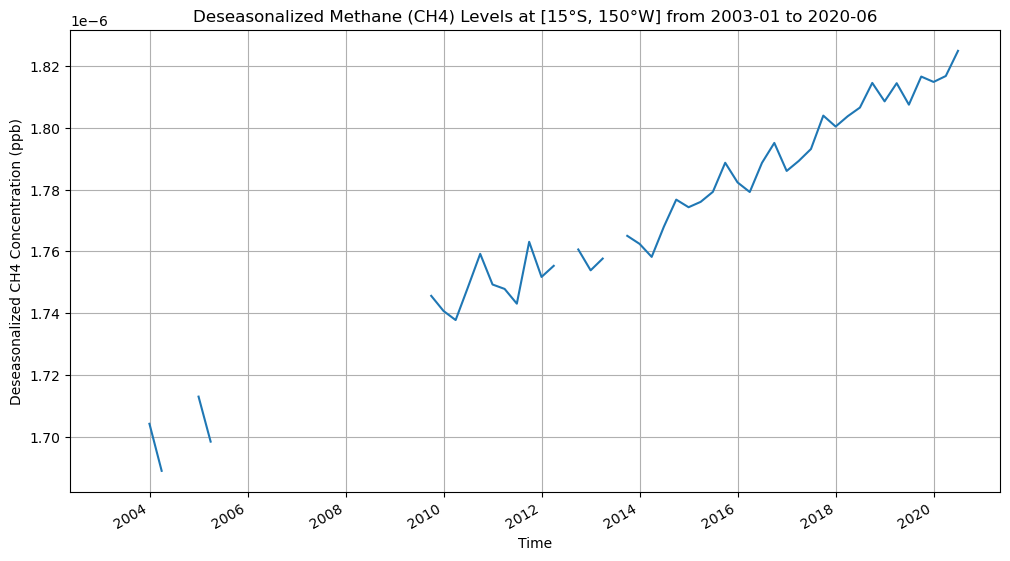

In [7]:
# 选择特定点的数据
point_ch4 = ds.xch4.sel(lat=slice(-17.5,-12.5), lon=slice(-152.5,-147.5)).sel(time=slice('2003-01','2020-06')).mean(dim=['lat', 'lon'])

# 去除季节性
deseasonalized_ch4 = point_ch4.resample(time='Q-Dec').mean(skipna=True)

# 绘制时间序列
plt.figure(figsize=(12, 6))
deseasonalized_ch4.plot()
plt.title('Deseasonalized Methane (CH4) Levels at [15°S, 150°W] from 2003-01 to 2020-06')
plt.xlabel('Time')
plt.ylabel('Deseasonalized CH4 Concentration (ppb)')
plt.grid(True)
plt.show()

#结果：减少季节性影响后发现全球甲烷浓度逐步上升，但有部分缺失数据

In [8]:
#2.1


# 读取数据
ds = xr.open_dataset(r'C:\Users\zjm\Desktop\ESE_5023\NOAA_NCDC_ERSST_v3b_SST.nc')

# 定义Niño 3.4区域的纬度和经度范围
lat_bounds = slice(-5, 5)  # 5°N到5°S
lon_bounds = slice(190, 240)  # 170°W到120°W

# 提取Niño 3.4区域的SST数据
nino34_sst = ds.sst.sel(lat=lat_bounds, lon=lon_bounds)

# 计算月气候平均值（1981-2010基准期）
monthly_climatology = nino34_sst.groupby('time.month').mean('time')

# 从SST时间序列中减去气候平均值以获得异常值
sst_anomalies = nino34_sst.groupby('time.month') - monthly_climatology
sst_anomalies


<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7286701 , -0.6683655 , ..., -0.33967972,
...
         -0.2555828 , -0.13972664],
        [-0.989378  , -1.0497723 , -1.0954857 , ..., -0.86087227,
         -0.7690697 , -0.65498734],
        [-1.1887245 , -1.252285  , -1.3029232 , ..., -1.0460625 ,
         -0.9661274 , -0.8785801 ],
        [-1.002367  , -1.0756893 , -1.1325111 , ..., -0.7207298 ,
         -0.6597252 , -0.5900669 ],
        [-0.5770798 , -0.65514374, -0.72174263, ..., -0.4353485 ,
         -0.36265945, -0.28103828]],

       [[-0.3578701 , -0.41542053, -0.47110367, ..., -0.2400589 ,
         -0.1464405 , -0.03788376],
        [-0.7678585 , -0.83501625, -0.9024124 , ..., -0.727829  ,
         -0.61603355, -0.48027992],
        [-0.96187973, -1.0445309 , -1.1224213 , ..., -0.9327831 ,
         -0.81235695, -0.6655674 ],
        [-0.82112694, -0.9206734 , -1.0085506 , ..., -0.6531601 ,
         -0.5626869 , -0.4374504 ],
        [-0.4864292 , -0.5823746 , -0.6702862 , ..., -0.36221695,
         -0.30041504, -0.1987915 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

C:\Users\28910\AppData\Local\Temp\ipykernel_20048\3130004447.py:5: RuntimeWarning: Mean of empty slice
  line_sst_anomalies = np.nanmean(sst_anomalies_rol,axis=(1,2))
C:\Users\28910\AppData\Local\Temp\ipykernel_20048\3130004447.py:6: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  t = pd.date_range(start='1960-01',periods=684,freq='m')


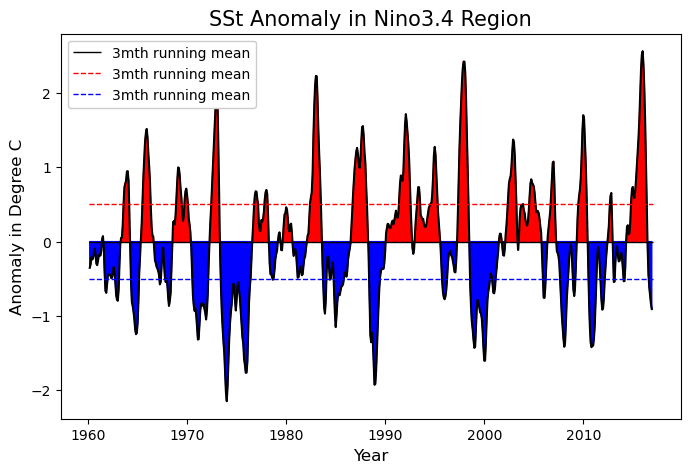

In [222]:
#2.2
sst_anomalies_rol = sst_anomalies.rolling(time=3, center=True).mean()

fig, ax= plt.subplots(1,1,figsize=(8,5),dpi=100)
line_sst_anomalies = np.nanmean(sst_anomalies_rol,axis=(1,2))
t = pd.date_range(start='1960-01',periods=684,freq='m')

ax.plot(t,line_sst_anomalies,color='k')

ax.set_ylabel('Anomaly in Degree C',color='k',fontsize=12)
ax.set_xlabel('Year',color='k',fontsize=12)
ax.set_title('SSt Anomaly in Nino3.4 Region',fontsize=15)

# NOTE: 图例设置有误 -1
ax.hlines(y=0,xmin=t[0],xmax=t[-1],color='k',ls='-',linewidth=1,label='3mth running mean')
ax.hlines(y=0.5,xmin=t[0],xmax=t[-1],color='r',ls='--',linewidth=1,label='3mth running mean')
ax.hlines(y=-0.5,xmin=t[0],xmax=t[-1],color='b',ls='--',linewidth=1,label='3mth running mean')

ax.legend(fontsize=10,frameon=True,framealpha=1,shadow=False)

ax.fill_between(t,line_sst_anomalies,where=(line_sst_anomalies>0),color='r')
ax.fill_between(t,line_sst_anomalies,where=(line_sst_anomalies<0),color='b')

In [223]:
#3
import os
import xarray as xr

# 设置文件夹路径
folder_path = 'd:\Microsoft VS Code\PS3'

# 创建一个空的列表来存储DataArray对象
data_arrays = []

# 遍历文件夹中的每个NC4文件
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    # 确保只处理文件，忽略文件夹
    if os.path.isfile(file_path) and file_name.endswith('.nc4'):
        # 使用xarray打开每个NC4文件并添加到列表中
        ds = xr.open_dataset(file_path)
        data_arrays.append(ds)

# 将所有DataArray对象合并成一个Dataset对象
ds = xr.concat(data_arrays, dim='time')

# 打印合并后的Dataset对象
print(ds)


<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\28910\AppData\Local\Temp\ipykernel_20048\2924231337.py:6: SyntaxWarning: invalid escape sequence '\M'
  folder_path = 'd:\Microsoft VS Code\PS3'


<xarray.Dataset>
Dimensions:   (time: 86, lat: 361, lon: 576)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 2015-01-16T12:00:00 ... 2022-02-15
Data variables:
    XCO2      (time, lat, lon) float64 0.0003946 0.0003946 ... 0.0004201
    XCO2PREC  (time, lat, lon) float64 1.796e-07 1.796e-07 ... 1.89e-07 1.89e-07
Attributes: (12/25)
    RangeBeginningDate:             2015-01-01
    RangeBeginningTime:             00:00:00.000000
    RangeEndingDate:                2015-01-01
    RangeEndingTime:                23:59:99.999999
    SpatialCoverage:                global
    SouthBoundingCoordinate:        -90.0
    ...                             ...
    ProductionDateTime:             2022-03-15T11:56:04Z
    History:                        Original file generated: Tue Mar 15 11:56...
    ShortName:                      OCO2_GEOS_L3C

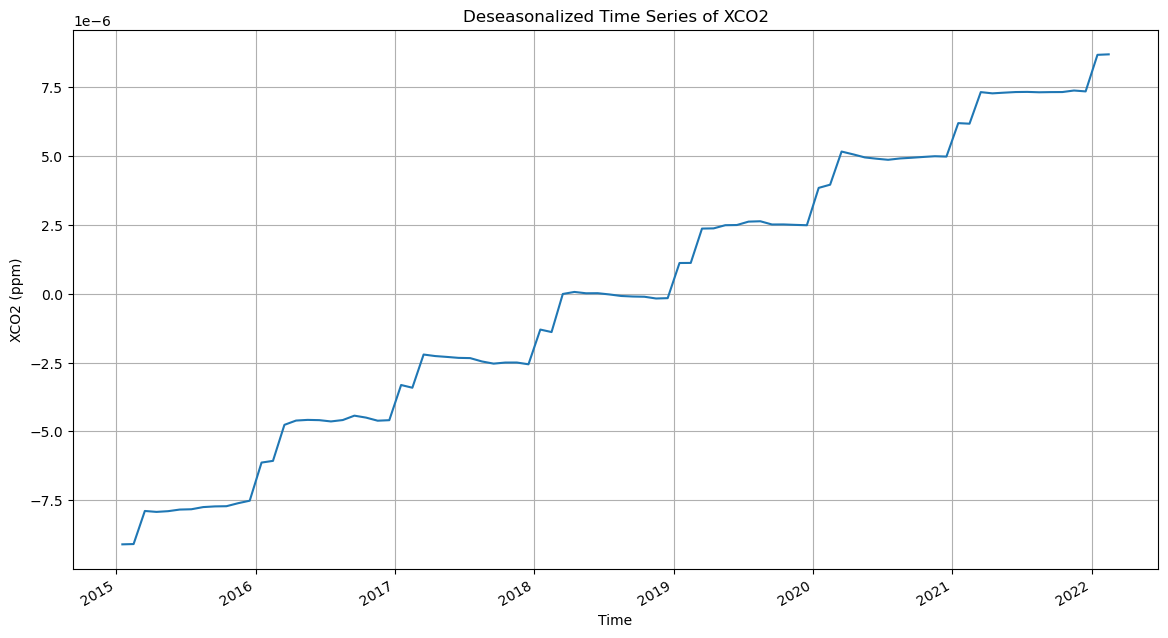

In [224]:
#3.1
XCO2 = ds['XCO2']

# 计算每个月的平均值（气候值）
monthly_climatology = XCO2.groupby('time.month').mean('time')

# 减去每个月的气候值，得到去季节周期的变量
XCO2_anomalies = XCO2.groupby('time.month') - monthly_climatology
line_XCO2_anomalies = XCO2_anomalies.mean(dim=('lat','lon'))

# 绘制去季节周期后的时间序列
plt.figure(figsize=(14, 7))
line_XCO2_anomalies.plot()
plt.title('Deseasonalized Time Series of XCO2')
plt.xlabel('Time')
plt.ylabel('XCO2 (ppm)')
plt.grid(True)
plt.show()


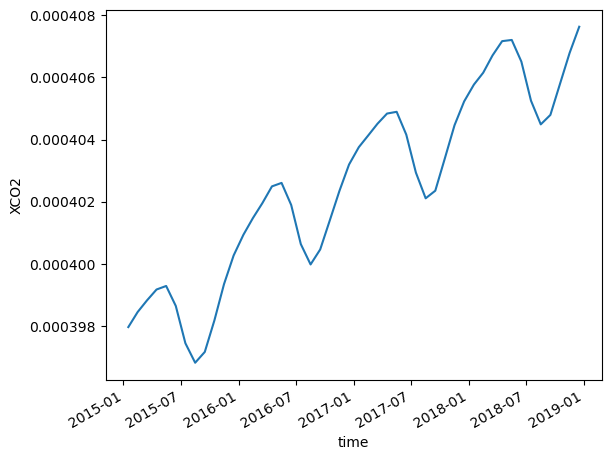

In [225]:
#3.2.1
#特定时间范围内全球平均CO2浓度时间序列
XCO2.mean(dim=('lon','lat')).sel(time=slice('2015','2018')).plot()



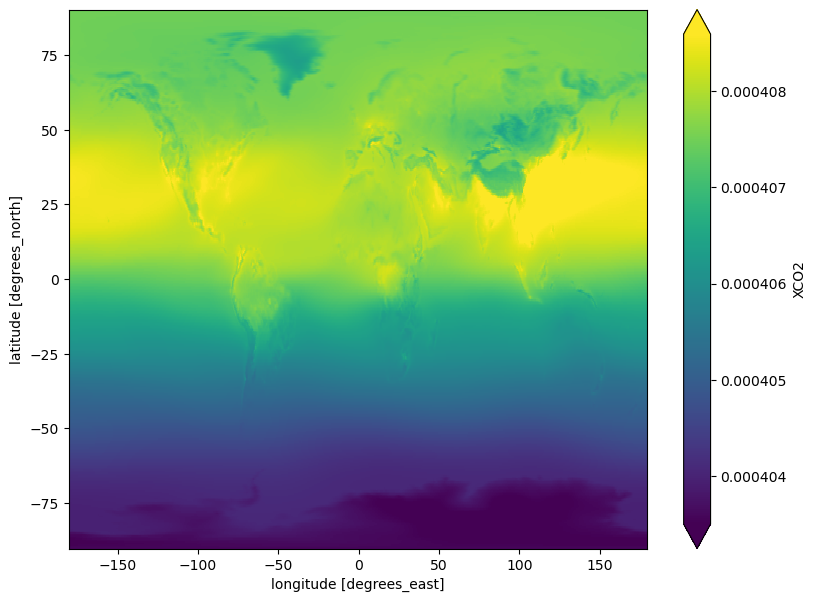

In [226]:
#3.2.2
# 全球CO2浓度历史平均浓度分布
XCO2.mean(dim='time').plot(size=7, robust=True)

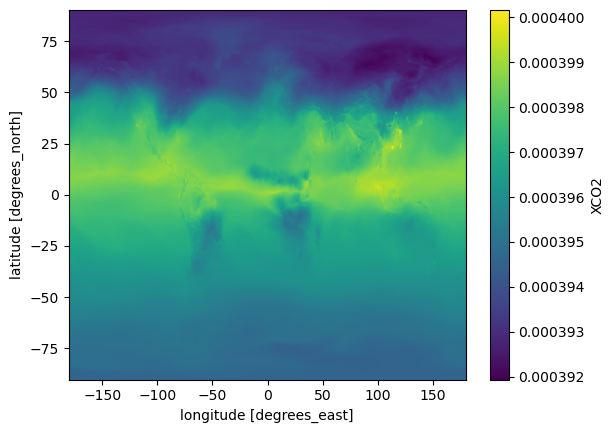

In [227]:
#3.2.3
#全球CO2浓度历史最低浓度分布
XCO2.min(dim=['time']).plot()

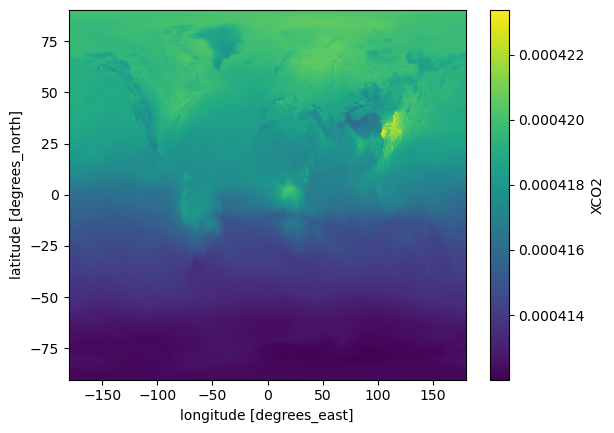

In [228]:
#3.2.4
#全球CO2浓度历史最高浓度分布
XCO2.max(dim=['time']).plot()

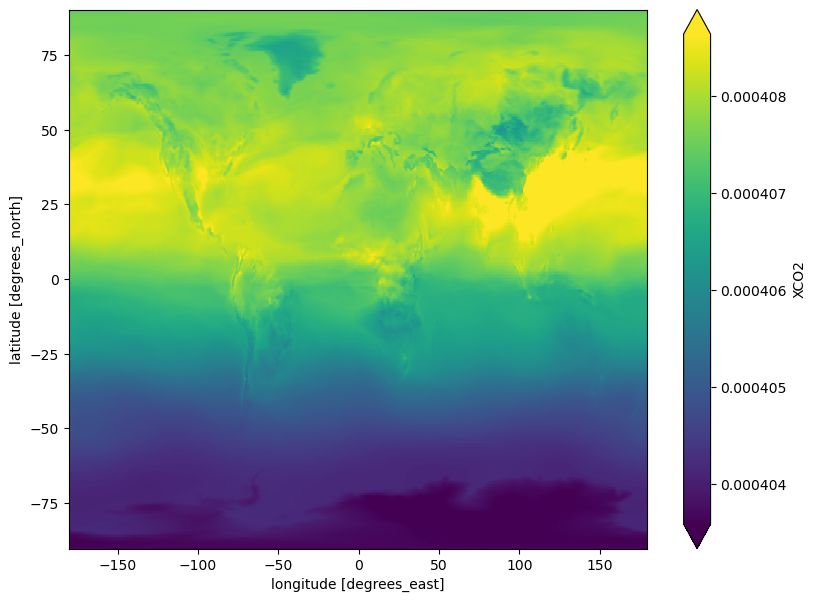

In [229]:
#3.2.5
#全球CO2浓度历史中位数浓度分布
XCO2.median(dim='time').plot(size=7, robust=True)

In [2]:
jupyter --version


NameError: name 'jupyter' is not defined